In [1]:
# import dependencies and print version
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Garamond"
plt.rcParams["font.size"] = 12
import seaborn as sns
import os

In [2]:
# read in excel sheets
path = 'input_sheets/1222'
# grab all file names in the directory
files = os.listdir(path)

In [3]:
# find the sheet names that are common to all files
for i in range(len(files)):
    sheets = pd.read_excel(f'{path}/{files[i]}', sheet_name=None)  # dictionary of sheets
    if i == 0:
        common_sheets = set(sheets.keys())
    else:
        common_sheets = common_sheets.intersection(set(sheets.keys()))
common_sheets = sorted(list(common_sheets))

In [18]:
# read each sheet in common_sheets into a dataframe df_{i}_{sheet_name} where i is the file number (starting from 0)
for i in range(len(files)):
    for sheet_name in common_sheets:
        exec(f'df_file{i}_{sheet_name} = sheets[sheet_name]')
        # print(f'df_file{i}_{sheet_name} shape: {eval(f"df_file{i}_{sheet_name}.shape")}')


In [5]:
# compare for each common sheet, the shape of the dataframes from each file
for sheet_name in common_sheets:
    print(f"{sheet_name}:", eval(f"df_file{0}_{sheet_name}.shape"), eval(f"df_file{1}_{sheet_name}.shape"), eval(f"df_file{2}_{sheet_name}.shape"))

all_functions: (21, 13) (21, 13) (21, 13)
all_marks: (71, 10) (71, 10) (71, 10)
canon: (26, 12) (26, 12) (26, 12)
delivery: (10, 3) (10, 3) (10, 3)
diag_dummy: (13, 10) (13, 10) (13, 10)
dummy_and_beard: (9, 10) (9, 10) (9, 10)
fdr_dummy: (6, 10) (6, 10) (6, 10)
hatch: (17, 10) (17, 10) (17, 10)
marklist: (95, 13) (95, 13) (95, 13)
parents: (35, 10) (35, 10) (35, 10)
pound: (26, 13) (26, 13) (26, 13)
review_parent: (21, 11) (21, 11) (21, 11)
swirl_cross: (35, 14) (35, 14) (35, 14)
swirl_hatch: (25, 10) (25, 10) (25, 10)
swirl_xy4: (41, 13) (41, 13) (41, 13)
xy4: (36, 13) (36, 13) (36, 13)
zonal_bkg: (4, 10) (4, 10) (4, 10)


In [6]:
def get_df_name(df):
    # get the name of the dataframe
    name = [x for x in globals() if globals()[x] is df][0]
    return name

In [7]:
# get_df_name(eval(f"df_file{0}_{common_sheets[-1]}"))

In [1]:
def func_count(df, actuall_run = False):
    # convert the df variable name to a string
    name = get_df_name(df)
    # print(f"{name} shape: {df.shape}")
    # get the column names
    cols = df.columns
    # print(f"{name} columns: {cols}")

    # with open('testout.txt','w+') as f:
    #     f.write(df.to_string(index=False))
    #     f.write('\n')

    # get the elements with first column value = 'y'; 
    # when actuall_run = True, get the elements with first column value = 'y' only
    if not actuall_run:
        filt = (df[cols[0]] == 'y') | (df[cols[0]] == 'n')
    else:
        filt = (df[cols[0]] == 'y')
    df_funcs = df[filt]['SampleStartLayoutAssembler']
    # with open('testout.txt','a+') as f:
    #     f.write(df_funcs.to_string(index=False))
    return name, df_funcs


In [2]:
def plot_count(name, df_funcs):
    df_plot = df_funcs.value_counts().reset_index().rename(columns={'SampleStartLayoutAssembler': 'func_name', 'index': 'count'}).sort_values(by='count', ascending=False)
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.barplot(data=df_plot, x='count', y='func_name', ax=ax, palette='viridis', hue='func_name')
    ax.set_xlabel('Number of Occurrences')
    ax.set_ylabel('Function Name')
    ax.set_title(f"count of {name}") # df name
    plt.savefig('test_fig.png', dpi=500, bbox_inches='tight')

31
Plotting df_file0_all_marks...


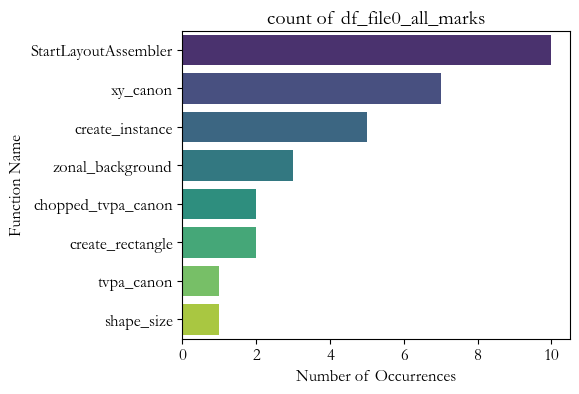

In [ ]:
name, df_funcs = func_count(eval(f"df_file{0}_{common_sheets[1]}"), actuall_run = True)
print(len(df_funcs))
if len(df_funcs)>0:
    print(f'Plotting {name}...')
    plot_count(name, df_funcs)